# Lab Assignment 1
## Exercize 2: Newton's and Steffensen's Fractals
---

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [221]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,1,0],[0,1,1],[1,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

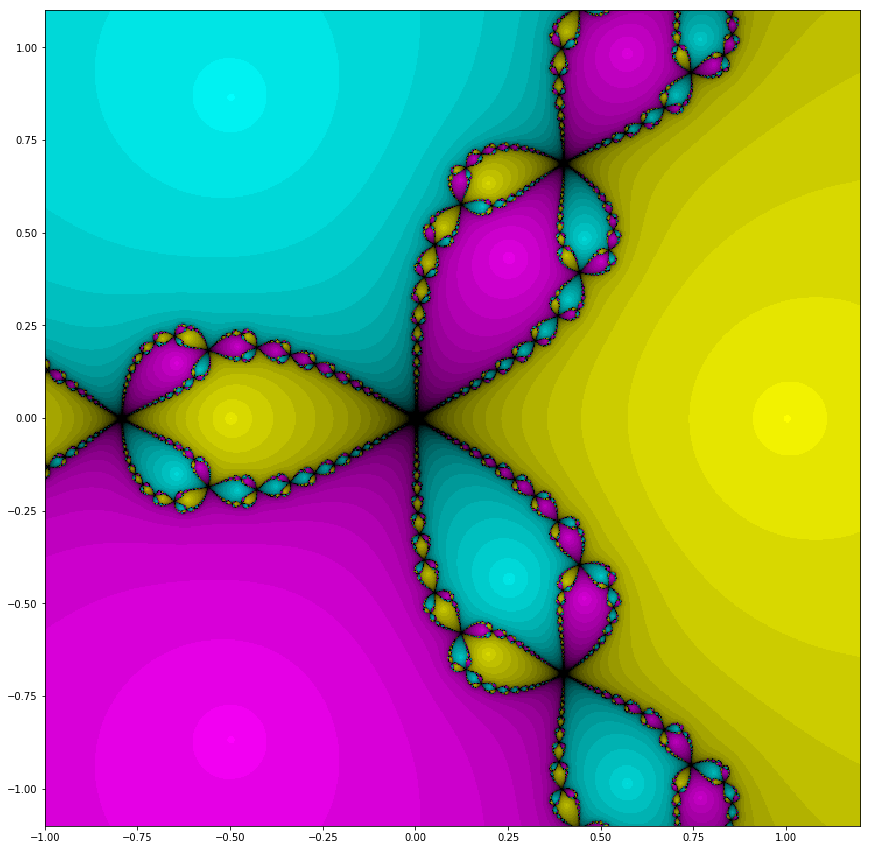

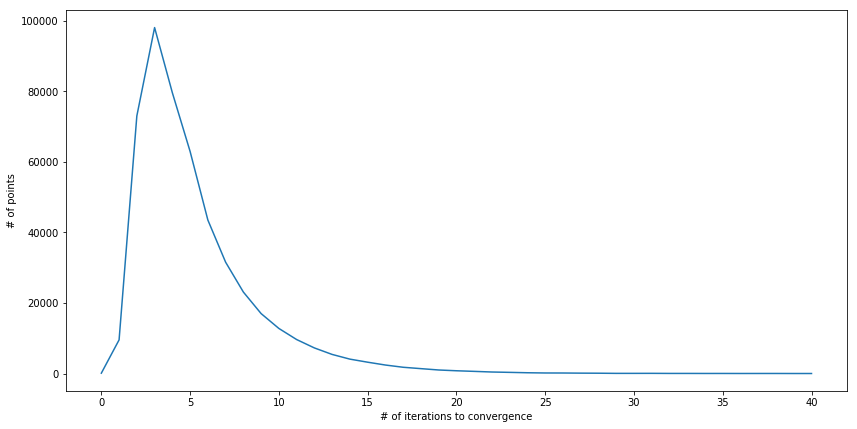

In [222]:
def clp(x):
    return max(0, x)

xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit

for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[clp(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
#scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### Questions
---

**1.** There is a large monochromatic region around each of the root, because the points in a region converge to the root with the same color. Generally, a point (not near the boundary) in the imaginary plane converges to the closet root (by distance) and requires only a few iterations.

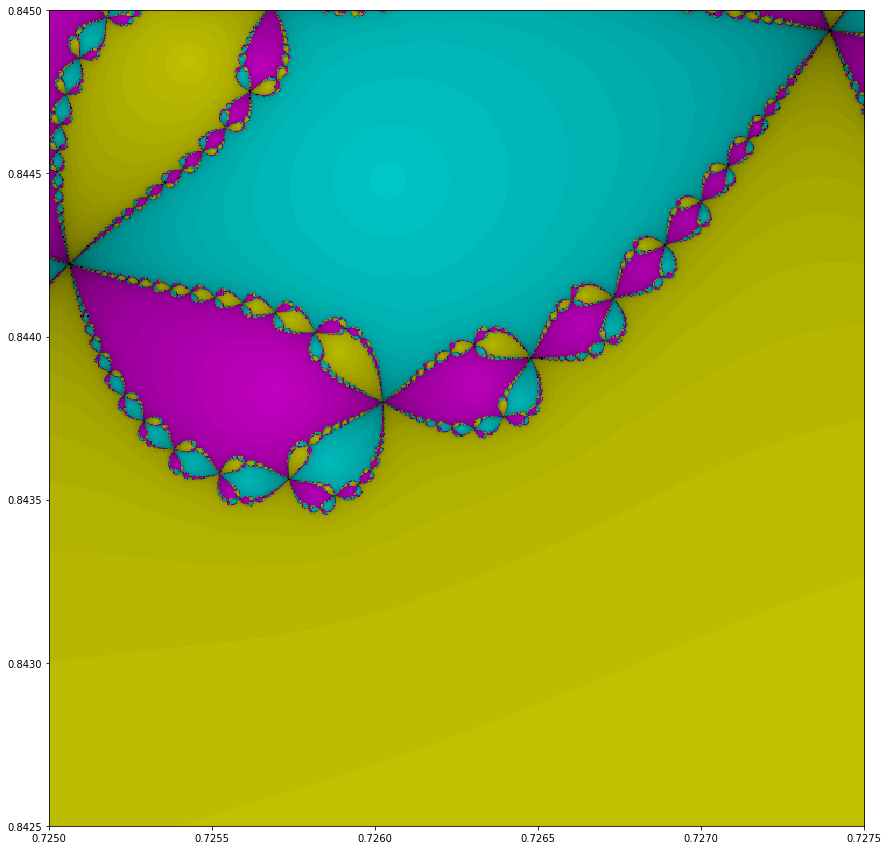

In [223]:
xmin = 0.7250
xmax = 0.7275
ymin = 0.8425
ymax = 0.8450
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=50
f = 1./sit

for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[clp(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()

**2.** As we zoom in, the fractals were darker since it took more iterations for points in the region to converge to a root. Thus, I modified the $sit$ variable so that it would not appear as dark.

From the result, we can see that there is a an infinite pattern of three "leaves" with each end of a leaf breaking into three and so on. This behavior near the boundary shows how delicate it is when choosing the starting point. The closer a point is to the boundary, the more iterations it takes to converge, as zooming-in to the boundary made the overall image darker. Also, the sensitivity of points near the boundary is due to the derivative being close to 0--a small change can lead to a convergence to another root.

**3.** We pick $x^3 + x^2 + x + 1$. We find that $x = -1, \pm i$ are the roots.

We define our Newton-Raphson iteration for our polynomial as $\psi(z)$.

In [224]:
# Newton-Raphson iteration for z**3 + z**2 + z + 1 = 0
def psi(z):
    z = complex(z)
    a = z**2
    return z - (z**3 + a + z + 1)/(3*a + 2*z + 1)

# Roots of z**3 + z**2 + z + 1 = 0
zz = [-1, complex(0, 1), complex(0, -1)]

# corresponding colors
cc = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

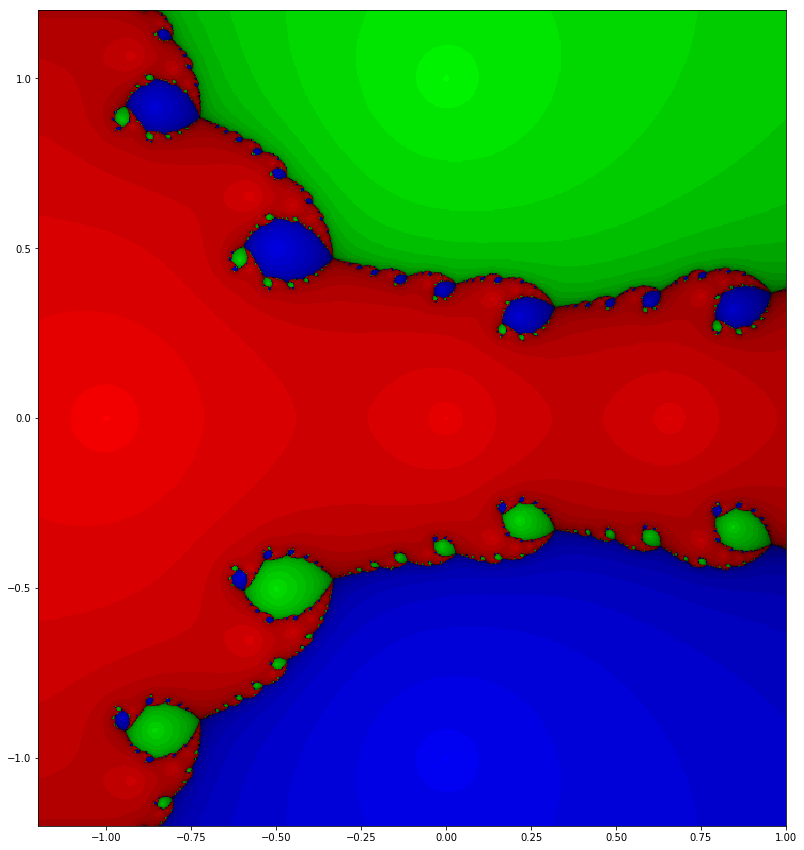

In [225]:
xmin = -1.2
xmax = 1.
ymin = -1.2
ymax = 1.2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=psi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[clp(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()

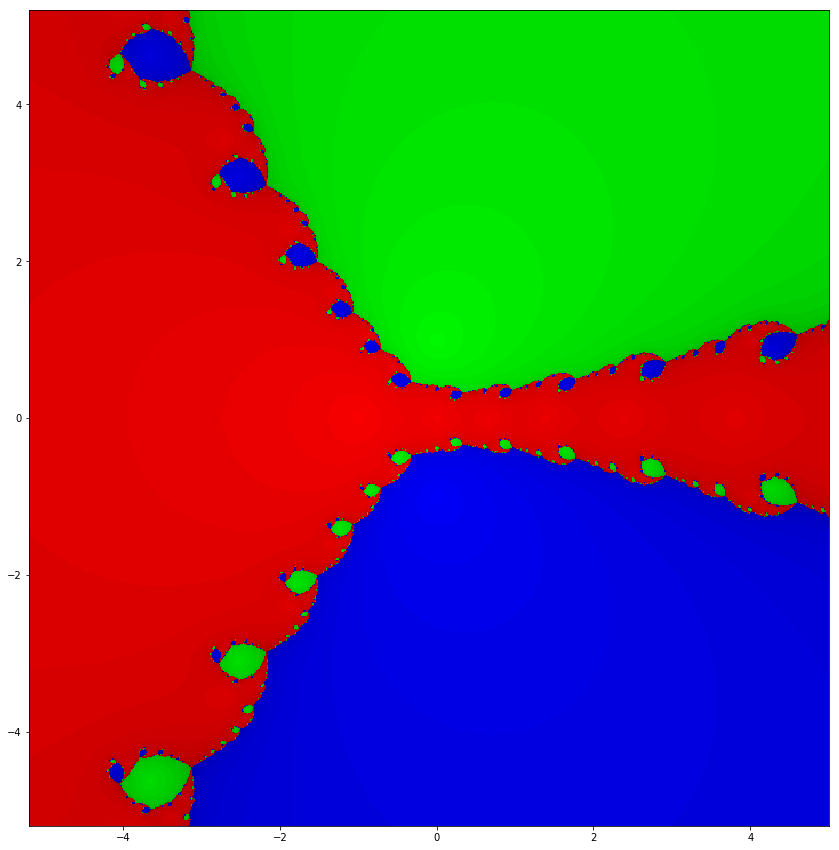

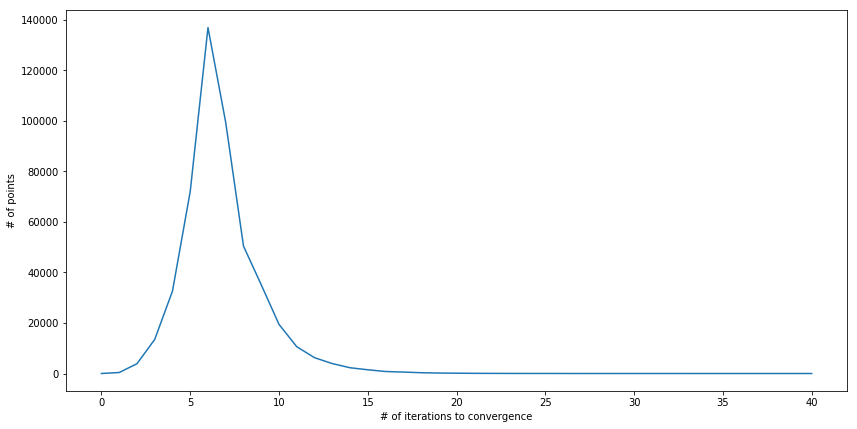

In [226]:
xmin = -5.2
xmax = 5.
ymin = -5.2
ymax = 5.2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=50
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=psi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[clp(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

The two images show the same functions, except the second one is zoomed out so we can see the overall shape.

The resulting graphics exhibit fractals near the boundary of two roots, but looks completely different than the image produced by $z^3-1$, as one region (red) splits the other two regions. From the first image, we can see that besides the roots, there is another region near the origin where the shading is lighter. We see $\psi(0) = -1$, which is one of the roots of the polynomial. Thus, we can see starting points that are closer to -1 and 0 converge to the root -1.

**4.** We create a function that takes as input $f$ and $\omega$ and returns $\phi$. 

In [277]:
def generate_phi(f, w):
    def phi(z):
        a = f(z)
        return z - (w*a*a)/(f(z + w*a) - a)
    return phi

# omega values
ww = [1., 2., 3., 4.]

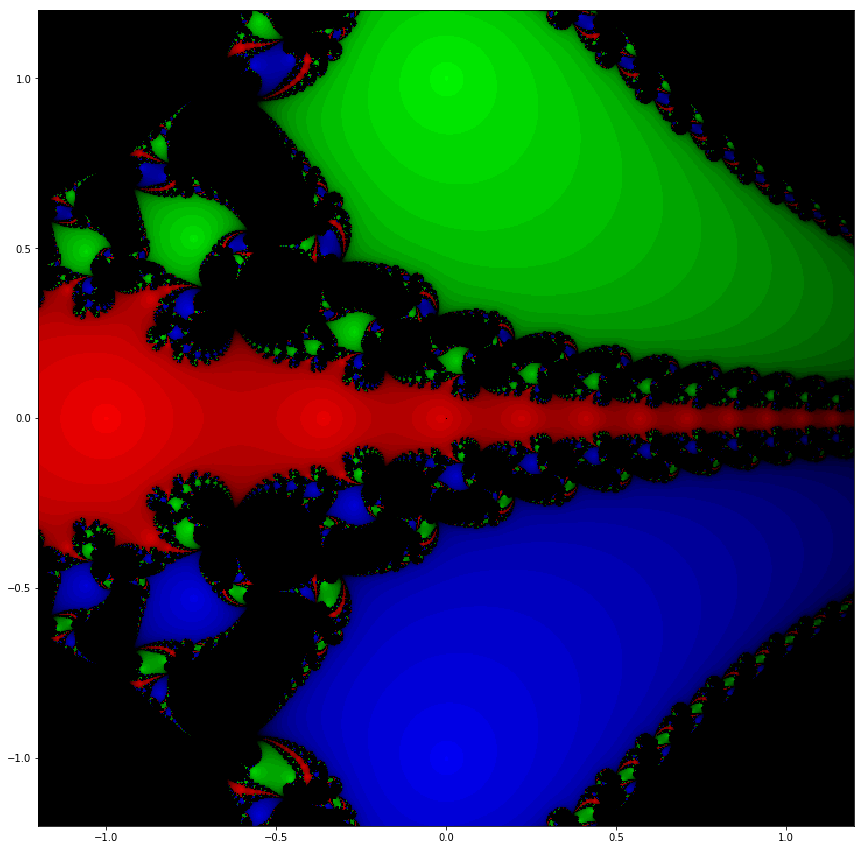

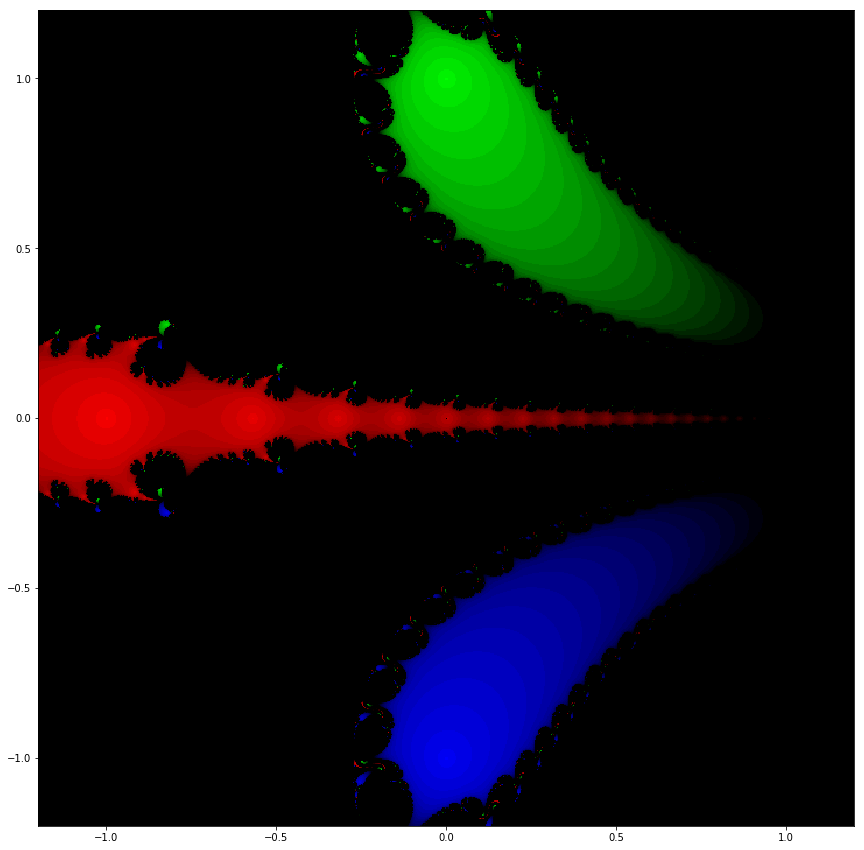

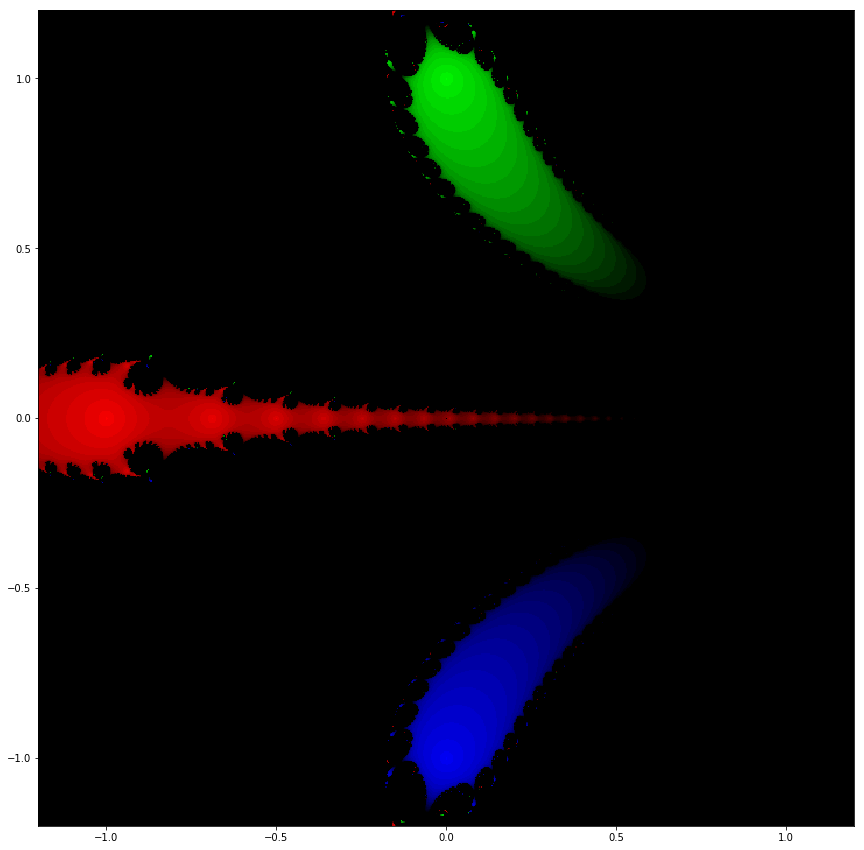

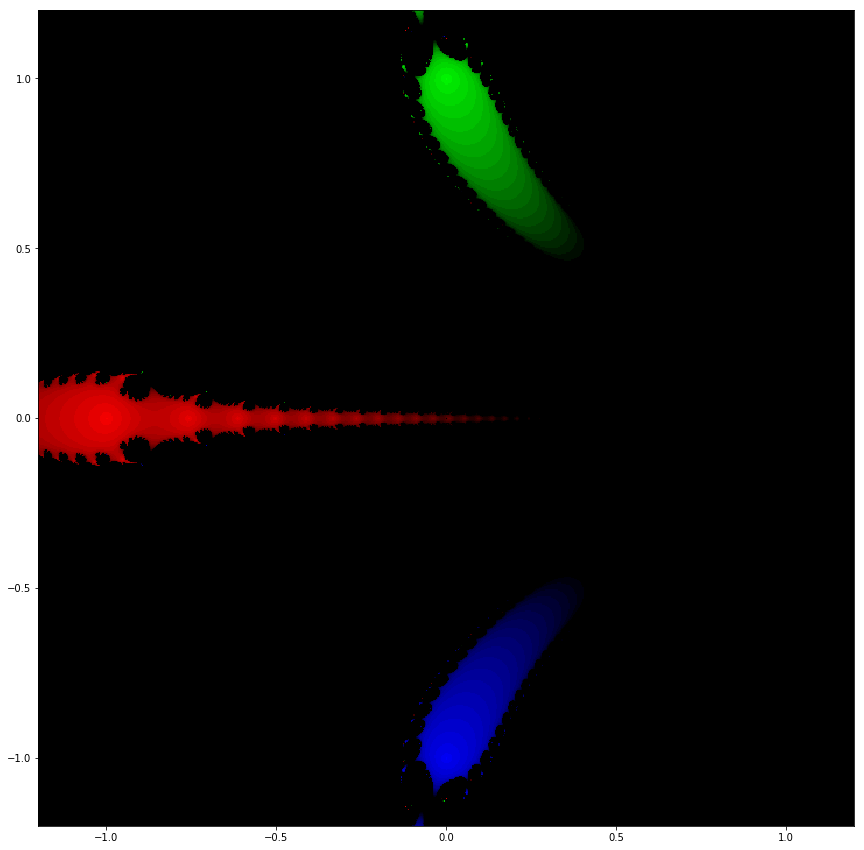

In [281]:
for w in ww:
    xmin = -1.2
    xmax = 1.2
    ymin = -1.2
    ymax = 1.2
    eps = .0001
    maxit = 40
    imgx = 700
    imgy = 700
    img = np.zeros((imgy,imgx,3))
    a = (xmax-xmin)/imgx
    b = (ymax-ymin)/imgy
    h = np.zeros(maxit+1)
    sit=20
    f = 1./sit

    # obtain phi
    phi = generate_phi(lambda z: z*(z*(z + 1) + 1) + 1, w)
    
    for i in range(imgy):
        for j in range(imgx):
            x=xmin+a*j
            y=ymax-b*i
            z0=complex(x,y)
            for k in range(maxit):
                if abs(z0)<eps:
                    h[maxit]+=1
                    break
                z=phi(z0)
                con=False
                for l in range(len(zz)):
                    if abs(z-zz[l])<eps:
                        con=True
                        break
                if(con):
                    img[i,j]=[clp((sit-k)*f*c) for c in cc[l]]
                    h[k]+=1
                    break
                z0=z
            if k==maxit: h[maxit]+=1
    plt.figure(figsize=(15,15))
    plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
    plt.show()

**5.** We only compute the derivative of $\phi$ in the real case. 

Let $\alpha$ be a root of $f$, so $f(\alpha) = 0$. Applying the definition of the derivative, we obtain
$$
    \phi'(z) = \lim\limits_{h \to 0} \frac{\phi(z + h) - \phi(z)}{h}.
$$
On a side note,
$$
    \lim\limits_{z \to \alpha} \phi(z) = \alpha - \lim\limits_{z \to \alpha} \frac{\omega f(z)^2}{f(z + \omega f(z)) - f(z)} \\
    = \alpha - \lim\limits_{z \to \alpha} f(z)\lim\limits_{z \to \alpha} \frac{\omega f(z)}{f(z + \omega f(z)) - f(z)} \\
    = \alpha - \frac{f(\alpha)}{f'(\alpha)} \\
$$
and we obtain
$$
    \lim\limits_{z \to \alpha} \phi(z) = \alpha \qquad (f'(\alpha) \ne 0)
$$
since $f(\alpha) = 0$. Thus, let $h = \alpha - z$ in the definition of the derivative, and we get
$$
    \phi'(z) = \lim\limits_{z \to \alpha} \frac{\phi(z) - \phi(\alpha)}{z - \alpha} = \lim\limits_{z \to \alpha} \frac{\left(z - \frac{\omega f(z)^2}{f(z + \omega f(z)) - f(z)} \right) - \phi(\alpha)}{z - \alpha}
$$
Distributing the limit and applying $\lim\limits_{z \to \alpha} \phi(z) = \alpha$ gives us
$$
    \phi'(z) = \frac{\lim\limits_{z \to \alpha}(z-\alpha) - \lim\limits_{z \to \alpha}\frac{\omega f(z)^2}{f(z + \omega f(z)) - f(z)}}{\lim\limits_{z \to \alpha}(z-\alpha)} = 1 - \lim\limits_{z \to \alpha} \frac{\omega f(z)^2}{(f(z + \omega f(z)) - f(z))(z - \alpha)}
$$
We cannot just substitute $\alpha$ into $z$ as we wish since it would give us a division by 0, so we approximate $\phi$ using the Taylor expansion of $f(z+\omega f(z))$ at $x$ (we show this by first expanding $f(x)$ at $c$ and then substituting in $z+\omega f(z)$ for $x$ and $z$ for $c$):
$$
    f(x) \approx f(c) + f'(c)(x - c) + \frac{f''(x)}{2}(x - c) + \dots \\
    \implies f(z+\omega f(z)) = f(z) + \omega f'(z)f(z) + \frac{f''(\xi)}{2}\omega^2 f(z)^2 \qquad (\xi \in (z, z + \omega f(z)))
$$
Substituting this expression into $\phi'(z)$ gives us
$$
    \phi'(z) = 1 - \lim\limits_{z \to \alpha} \frac{\omega f(z)^2}{((f(z) + \omega f'(z)f(z) + \frac{\omega^2}{2}f''(\xi)f(z)^2) - f(z))(z-\alpha)} \\
    \phi'(z) = 1 - \lim\limits_{z \to \alpha}\frac{f(z)}{(f'(z) + \frac{\omega}{2}f''(\xi)f(z))(z-\alpha)}
$$
Subtracting and substituting in $f(\alpha) = 0$ and distributing the limit yields
$$
    \phi'(z) = 1 - \frac{1}{f'(z)} \lim\limits_{z\to\alpha} \frac{f(z) - f(\alpha)}{z - \alpha} = 1 - \frac{f'(z)}{f'(z)} = 0 \qquad (f'(z) \ne 0)
$$

We go back to Steffensen's iteration, and we note that $z_{n+1} = \phi(z_n)$ and the error term $e_n = z_n - \alpha$.

We apply Taylor's expansion of $z_{n+1} = \phi(z_n)$ at $\alpha$, giving
$$
    z_{n+1} \approx \phi(\alpha) + \phi'(\alpha)(z_n - \alpha) + \frac 1 2 \phi''(z_n)(z_n - \alpha)^2 = \alpha + e_n\phi'(\alpha) + \frac{e_n^2}{2}\phi''(\alpha),
$$
since $\lim\limits_{z\to\alpha} \phi(\alpha) = \alpha$.
Thus, applying $\phi'(\alpha) = 0$ and letting $M := \frac{\phi''(\alpha)}{2}$,
$$
    e_{n+1} = z_{n+1} - \alpha \approx e_n\phi'(\alpha) + \frac{e_n^2}{2}\phi''(\alpha) = 0 + Me_n^2
$$
Since $e_{n+1} \le Me_n^2$, Steffensen's method is locally a quadratically convergent method.

**6.** Setting the shading of the color returned a negative number for the RGB (when $k > sit$), so I took the maximum of 0 and the color, so that the code would not give us an error.